In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
train=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\aug_train.csv")
test=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\aug_test.csv")
train.shape

(19158, 14)

In [3]:
test.shape


(2129, 13)

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [8]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [9]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
train.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [11]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [12]:
##TREATING THE NULL VALUES THAT CONTAIN DATATYPE=OBJECT
train.fillna(train.select_dtypes(include='object').mode().iloc[0],inplace=True)
##TREATING THE NULL VALUES THAT CONTAIN DATATYPE=FLOAT64,INT64
train.fillna(train.select_dtypes(include=['float64','int64']).median().iloc[0],inplace=True)

In [13]:
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [15]:
##TREATING THE NULL VALUES THAT CONTAIN DATATYPE=OBJECT
test.fillna(test.select_dtypes(include='object').mode().iloc[0],inplace=True)
##TREATING THE NULL VALUES THAT CONTAIN DATATYPE=FLOAT64,INT64
test.fillna(test.select_dtypes(include=['float64','int64']).median().iloc[0],inplace=True)

In [16]:
test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

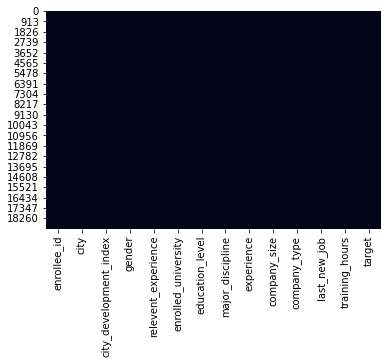

In [17]:
sns.heatmap(train.isnull(), cbar=False)
plt.show()


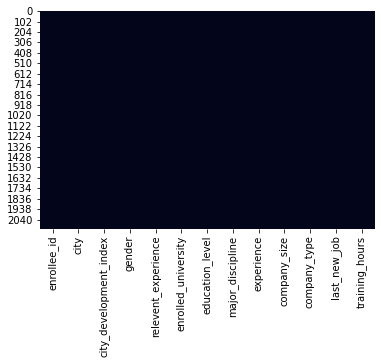

In [18]:
sns.heatmap(test.isnull(), cbar=False)
plt.show()


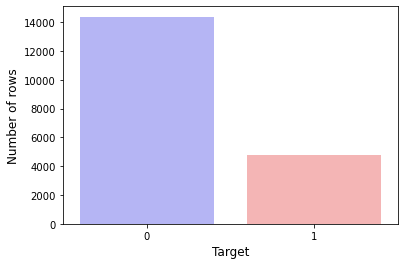

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(train.target.value_counts().index.astype(int),train.target.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.show()

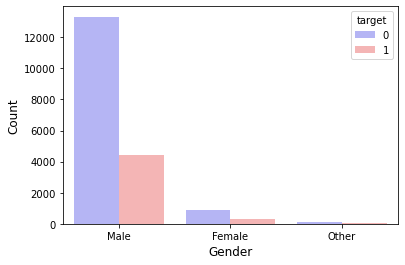

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(train.gender, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

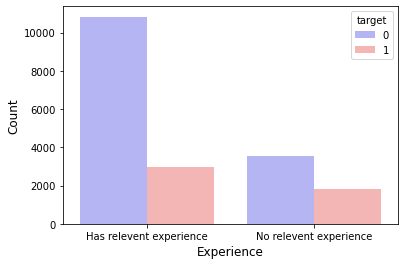

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(train.relevent_experience, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experience', fontsize=12)
plt.show()


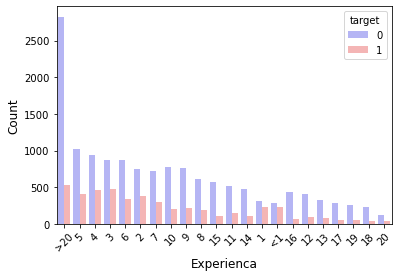

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(train.experience, palette='bwr', hue=train.target.astype(int),order=train.experience.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Experienca', fontsize=12)
plt.xticks(rotation=45)
plt.show()

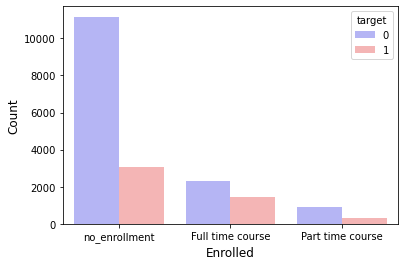

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(train.enrolled_university, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Enrolled', fontsize=12)
plt.show()

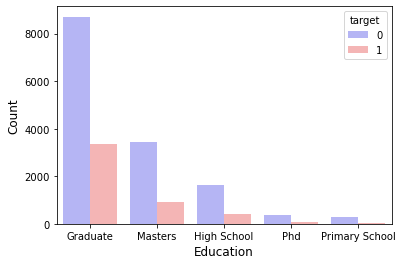

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(train.education_level, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Education', fontsize=12)
plt.show()

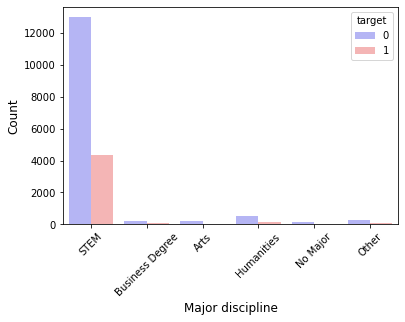

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(train.major_discipline, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Major discipline', fontsize=12)
plt.xticks(rotation=45)
plt.show()

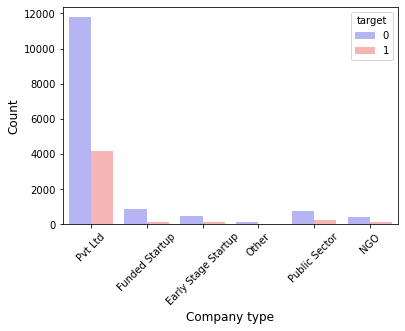

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(train.company_type, palette='bwr', hue=train.target.astype(int))
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.xticks(rotation=45)
plt.show()

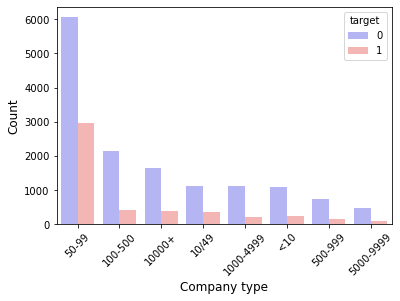

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(train.company_size, palette='bwr',
              hue=train.target.astype(int),
              order=train.company_size.value_counts().index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Company type', fontsize=12)
plt.xticks(rotation=45)
plt.show()


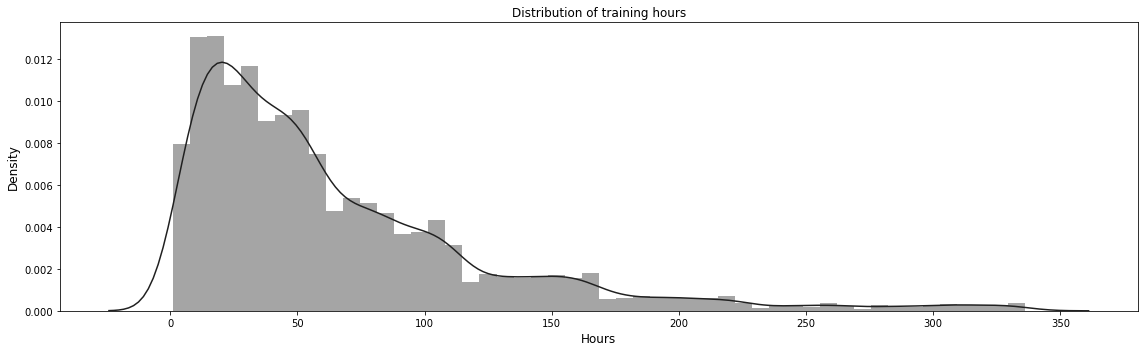

In [28]:
plt.figure(figsize=(16, 5))
sns.distplot(train.training_hours, color='#202020')
plt.title('Distribution of training hours')
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.show()

In [29]:
train = train.drop([ 'city', 'city_development_index', 'training_hours'], axis=1)
test = test.drop([ 'city', 'city_development_index', 'training_hours'], axis=1)

In [30]:
train.columns

Index(['enrollee_id', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'target'],
      dtype='object')

In [31]:
test.columns

Index(['enrollee_id', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [32]:
objList = train.select_dtypes(include = "object").columns
print('Categorical columns: ', objList)

Categorical columns:  Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [33]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
for code in objList:
    train[code] = label_encoder.fit_transform(train[code].astype(str))
    test[code] = label_encoder.fit_transform(test[code].astype(str))

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   enrollee_id          19158 non-null  int64  
 1   gender               19158 non-null  int32  
 2   relevent_experience  19158 non-null  int32  
 3   enrolled_university  19158 non-null  int32  
 4   education_level      19158 non-null  int32  
 5   major_discipline     19158 non-null  int32  
 6   experience           19158 non-null  int32  
 7   company_size         19158 non-null  int32  
 8   company_type         19158 non-null  int32  
 9   last_new_job         19158 non-null  int32  
 10  target               19158 non-null  float64
dtypes: float64(1), int32(9), int64(1)
memory usage: 973.0 KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   enrollee_id          2129 non-null   int64
 1   gender               2129 non-null   int32
 2   relevent_experience  2129 non-null   int32
 3   enrolled_university  2129 non-null   int32
 4   education_level      2129 non-null   int32
 5   major_discipline     2129 non-null   int32
 6   experience           2129 non-null   int32
 7   company_size         2129 non-null   int32
 8   company_type         2129 non-null   int32
 9   last_new_job         2129 non-null   int32
dtypes: int32(9), int64(1)
memory usage: 91.6 KB


In [36]:
X = train.drop('target', axis=1)
y = train.target

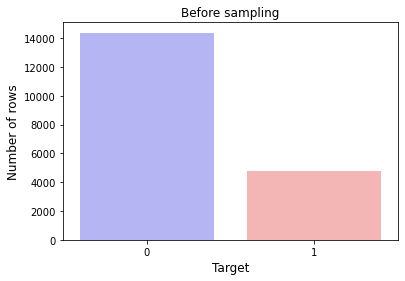

In [37]:
plt.figure(figsize=(6, 4))
sns.barplot(y.value_counts().index.astype(int), y.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Before sampling')
plt.show()


In [38]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)


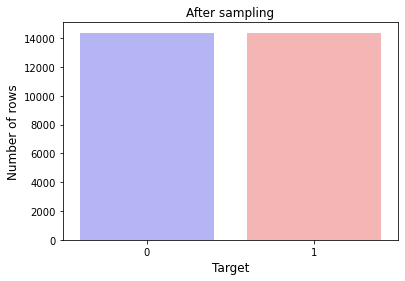

In [39]:
plt.figure(figsize=(6, 4))
sns.barplot(y_smote.value_counts().index.astype(int),y_smote.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('After sampling')
plt.show()


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2,random_state=42)

In [42]:
gb = GaussianNB()
gb.fit(X_smote,y_smote)
print(classification_report(y_smote, gb.predict(X_smote)))

              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64     14381
         1.0       0.64      0.72      0.68     14381

    accuracy                           0.66     28762
   macro avg       0.66      0.66      0.66     28762
weighted avg       0.66      0.66      0.66     28762



In [43]:
print(gb.score(X_smote, y_smote))

0.6584729851887907


In [44]:
lr = LogisticRegression()
lr.fit(X_smote,y_smote)
print(classification_report(y_smote, lr.predict(X_smote)))

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.63     14381
         1.0       0.63      0.65      0.64     14381

    accuracy                           0.63     28762
   macro avg       0.63      0.63      0.63     28762
weighted avg       0.63      0.63      0.63     28762



In [45]:
print(lr.score(X_smote, y_smote))

0.631979695431472


In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_smote,y_smote)
print(classification_report(y_smote, rfc.predict(X_smote)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14381
         1.0       1.00      1.00      1.00     14381

    accuracy                           1.00     28762
   macro avg       1.00      1.00      1.00     28762
weighted avg       1.00      1.00      1.00     28762



In [47]:
print(rfc.score(X_smote, y_smote))

0.9999304638064113


In [48]:
test.head()

,enrollee_id,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,32403,1,0,0,0,5,19,7,5,0
1,9858,0,0,2,0,5,15,4,5,0
2,31806,1,1,2,1,5,20,4,5,5
3,27385,1,0,2,2,5,2,0,5,0
4,27724,1,0,2,0,5,21,3,5,4


In [49]:
prediction = rfc.predict(test)

In [51]:
#Create a  DataFrame
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':prediction})
submission.head()

,enrollee_id,target
0,32403,0.0
1,9858,1.0
2,31806,0.0
3,27385,0.0
4,27724,0.0


In [52]:
filename = 'submision.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submision.csv
